<a href="https://colab.research.google.com/github/prosvirinKir/Numerical-Linear-Algebra/blob/main/NLA_HW2_ProsvirinKV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem set 2 (45 + 50 + 33 + 15 = 143 pts)

## Problem 1 (LU decomposition) 45 pts


### 1. LU  for band matrices and Cholesky decomposition (13 pts)

The complexity to find an LU decomposition of a dense $n\times n$ matrix is $\mathcal{O}(n^3)$.
Significant reduction in complexity can be achieved if the matrix has a certain structure, e.g. it is sparse. 
In the following task we consider an important example of $LU$ for a special type of matrices –– band matrices with top left entry equal to 1 and the bandwidth $m$ equal to 3 or 5 which called tridiagonal and pentadiagonal respectively. The bands may be ```[1, 2, 1]``` and ```[1, 1, 2, 1, 1]``` respectively

- (4 pts) Write a function ```band_lu(diag_broadcast, n)``` which computes LU decomposition for tridiagonal or pentadiagonal matrix with top left entry equal to 1 with given diagonal bands. 
For example, input parametres ```(diag_broadcast = [1,2,1], n = 4)``` mean that we need to find LU decomposition for the triangular matrix of the form:

$$A = \begin{pmatrix}
1 & 1 & 0 & 0\\
1 & 2 & 1 & 0 \\
0 & 1 & 2 & 1 \\
0 & 0 & 1 & 2 \\
\end{pmatrix}.$$

Provide the extensive testing of the implemented function that will works correctly for large $n$,  e.g. $n=100$.
As an output it is considered to make ```L``` and ```U``` - 2D arrays representing diagonals in factors $L$ (```L[0]``` keeps first lower diagonal, ```L[1]``` keeps second lower, ...), and $U$ (```U[:,0]``` keeps main diagonal, ```U[:,1]``` keeps first upper, ...).

Let $m = 3$, then find $LU$ decomposition:
$$$$
$$
\left(\begin{array}{ccccc}
{b} & {c} & {0} & {} & {0} \\
{a} & {b} & {c} & {} &  \\ 
{} & {\ddots} & {\ddots} & {\ddots} & {} \\
{} & {} & {a} & {b} & {c} \\ 
{0} & {} & {0} & {a} & {b}\end{array}\right) 
= \left(\begin{array}{ccccc}
{1} \\
{l_{2}} & {1} & {0} & {} \\
{0} & {l_{3}} & {1} & {} \\
{} & {} & {\ddots} & {\ddots} \\ 
{} & {} & {} & {0} & {l_{n}} & {1}
\end{array}\right) 
\left(\begin{array}{ccccc}
{u_{1}} & {c} & {0} & {} & {} \\ 
{0} & {u_{2}} & {c} & {0} & {} \\
{} & {} & {\ddots} & {\ddots} & {} \\
{} & {} & {0} & {u_{n-1}} & {c} \\
{} & {} & {} & {0} & {u_{n}}
\end{array}\right)
$$
$$$$
From this view we can get:
$$$$
$$
b = u_1 \Rightarrow u_1 = b, \\
a = l_ku_{k - 1} \Rightarrow l_k = \frac{a}{u_{k - 1}}, \\
b = l_kc + u_k \Rightarrow u_k = b - l_kc, k \in \overline{2, n}.
$$
$$$$
We can compute all $l_k, u_k$ for $O(n)$. 

Let $m = 5$, then find $LU$ decomposition:
$$$$
$$
\left(\begin{array}{cccccccc}
{c} & {d} & {e} & {0} & {\ldots} & {\ldots} & {\ldots} & {0} \\ 
{b} & {c} & {d} & {e} & {0} & {\ldots} & {\ldots} &  {0} \\
{a} & {b} & {c} & {d} & {e} & {0} & {\ldots} & {0} \\
{0} & {a} & {b} & {c} & {d} & {e} & {\ldots} & {0} \\
{\ldots} & {\ldots} & {\ldots} & {\ldots} & {\ldots} & {\ldots} & {\ldots} & {\ldots} \\ 
{0} & {\ldots} & {a} & {b} & {c} & {d} & {e} & {0} \\ 
{0} & {\ldots} & {0} & {a} & {b} & {c} & {d} & {e} \\ 
{0} & {\ldots} & {\ldots} & {0} & {a} & {b} & {c} & {d} \\ 
{0} & {\ldots} & {\ldots} & {\ldots} & {0} & {a} & {b} & {c}
\end{array}\right) = 
\left(\begin{array}{cccccccc}
{1} & {0} & {\ldots} & {\ldots} & {\ldots} & {\ldots} & {\ldots} & {0} \\ 
{l_2} & {1} & {0} & {\ldots} & {\ldots} & {\ldots} & {\ldots} &  {0} \\
{k_3} & {l_3} & {1} & {0} & {\ldots} & {\ldots} & {\ldots} & {0} \\
{0} & {k_4} & {l_4} & {1} & {0} & {\ldots} & {\ldots} & {0} \\
{\ldots} & {\ldots} & {\ldots} & {\ldots} & {\ldots} & {\ldots} & {\ldots} & {\ldots} \\ 
{0} & {\ldots} & {\ldots} & {0} & {k_{n - 1}} & {l_{n - 1}} & {1} & {0} \\ 
{0} & {\ldots} & {\ldots} & {\ldots} & {0} & {k_n} & {l_{n}} & {1}
\end{array}\right)
\left(\begin{array}{cccccccc}
{u_1} & {t_2} & {e} & {\ldots} & {\ldots} & {\ldots} & {\ldots} & {0} \\ 
{0} & {u_2} & {t_3} & {e} & {\ldots} & {\ldots} & {\ldots} &  {0} \\
{0} & {0} & {u_3} & {t_4} & {e} & {\ldots} & {\ldots} & {0} \\
{\ldots} & {\ldots} & {\ldots} & {\ldots} & {\ldots} & {\ldots} & {\ldots} & {\ldots} \\ 
{0} & {\ldots} & {\ldots} & {0} & {u_{n - 3}} & {t_{n - 2}} & {e} & {0} \\ 
{0} & {\ldots} & {\ldots} & {\ldots} & {0} & {u_{n - 2}} & {t_{n - 1}} & {e} \\ 
{0} & {\ldots} & {\ldots} & {\ldots} & {\ldots} & {0} & {u_{n - 1}} & {t_n} \\ 
{0} & {\ldots} & {\ldots} & {\ldots} & {\ldots} & {\ldots} & {0} & {u_n}
\end{array}\right)
$$
$$$$
From this view we can get:
$$$$
$$
c = u_1, d = t_2 \Rightarrow u_1 = c, t_2 = d; \\
b = u_1l_2, c = t_2l_2 + u_2, d = el_2 + t_3 \Rightarrow l_2 = \frac{b}{u_1}, u_2 = c - t_2l_2, t_3 = d - el_2; \\
a = k_3u_1, b = k_3t_2 + l_3u_2, c = k_3e + l_3t_3 + u_3, d = el_3 + t_4 \Rightarrow k_3 = \frac{a}{u_1}, l_3 = \frac{b - k_3t_2}{u_2}, u_3 = c - k_3e - l_3t_3, t_4 = d - el_3 \\
\ldots\\
d = t_{i} + el_{i - 1}, i \in \overline{3, n} \Rightarrow t_{i} = d - el_{i - 1}, i \in \overline{3, n}\\
a = k_{i}u_{i - 2}, b = k_{i}t_{i - 1} + l_{i}u_{i - 1} \Rightarrow k_{i} = \frac{a}{u_{i - 2}}, l_{i} = \frac{b - k_it_{i - 1}}{u_{i - 1}},  i \in \overline{3, n}\\
c = k_{i}e + l_{i}t_{i} + u_{i} \Rightarrow u_{i} = c - k_{i}e - l_{i}t_{i},  i \in \overline{3, n}.
$$
$$$$
We can compute all $t_{i}, k_{i}, l_{i}, u_{i}$ also for $O(n)$.

Now, let's emplement the function:

In [159]:
from scipy import linalg
from scipy.sparse import diags
from scipy.linalg import hessenberg
from scipy.linalg import pascal
from scipy.linalg import norm


import jax.numpy as jnp
import numpy as np
import scipy.sparse as spsp
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
def band_lu(diag_broadcast, n):
    # enter your code here


    m = len(diag_broadcast)
    a = diag_broadcast[0]
    b = diag_broadcast[1]
    c = diag_broadcast[2]

    if (m == 3):
        L = np.zeros((1, n - 1))
        U = np.zeros((n, 2))
        U[0][0] = b
        U[:, 1] = c * np.ones(n)
        U[n - 1][1] = 0
        for i in range(1, n):
            L[0][i - 1] = a / U[i - 1][0]
            U[i][0] = b - L[0][i - 1] * c
        
    if (m == 5):
        L = np.zeros((2, n - 1))
        U = np.zeros((n, 3))
        d = diag_broadcast[3]
        e = diag_broadcast[4]

        U[:, 2] = e*np.ones(n)
        U[n - 2][2] = 0
        U[n - 1][2] = 0
        U[0][0] = c 
        U[0][1] = d 
        L[0][0] = b/c 
        U[1][0] = c - U[0][1]*L[0][0]

        for i in range(2, n):
            U[i - 1][1] = d - e*L[0][i - 2]
            L[1][i - 2] = a/U[i - 2][0]
            L[0][i - 1] = (b - L[1][i - 2]*U[i - 2][1])/U[i - 1][0]
            U[i][0] = c - L[1][i - 2]*e - L[0][i - 1]*U[i - 1][1]
            
        
    return L, U



- (2 pts) Compare execution time of the band LU decomposition using standard function from ```scipy```, i.e. which takes the whole matrix and does not know about its special structure, and band decomposition of yours implementation. Comment on the results.

In [134]:
import time

n_arr =  [1000*(i + 1) for i in range(10)]
time_band_lu_3_diag = []
time_band_lu_5_diag = []
time_library_lu_3_diag = []
time_library_lu_5_diag = []
diag_broadcast_1 = [5, -2, 1]
diag_broadcast_2 = [1, 2, 3, 4, 6]

for n in n_arr:
    t = time.time()
    res_band_lu_3_diag = band_lu(diag_broadcast_1, n)
    time_band_lu_3_diag.append(time.time() - t)

    t = time.time()
    res_band_lu_5_diag = band_lu(diag_broadcast_2, n)
    time_band_lu_5_diag.append(time.time() - t)

    t = time.time()
    res_library_lu_3_diag = linalg.lu(diags(diag_broadcast_1, [-1, 0, 1], shape=(n, n)).toarray())
    time_library_lu_3_diag.append(time.time() - t)

    t = time.time()
    res_library_lu_5_diag = linalg.lu(diags(diag_broadcast_2, [-2, -1, 0, 1, 2], shape=(n, n)).toarray())
    time_library_lu_5_diag.append(time.time() - t)

In [143]:
n_arr, time_library_lu_3_diag

([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000],
 [0.04889082908630371,
  0.2234790325164795,
  0.6491377353668213,
  1.4830875396728516,
  2.7405471801757812,
  4.4344446659088135,
  6.778566122055054,
  10.290635108947754,
  14.13064455986023,
  19.87480330467224])

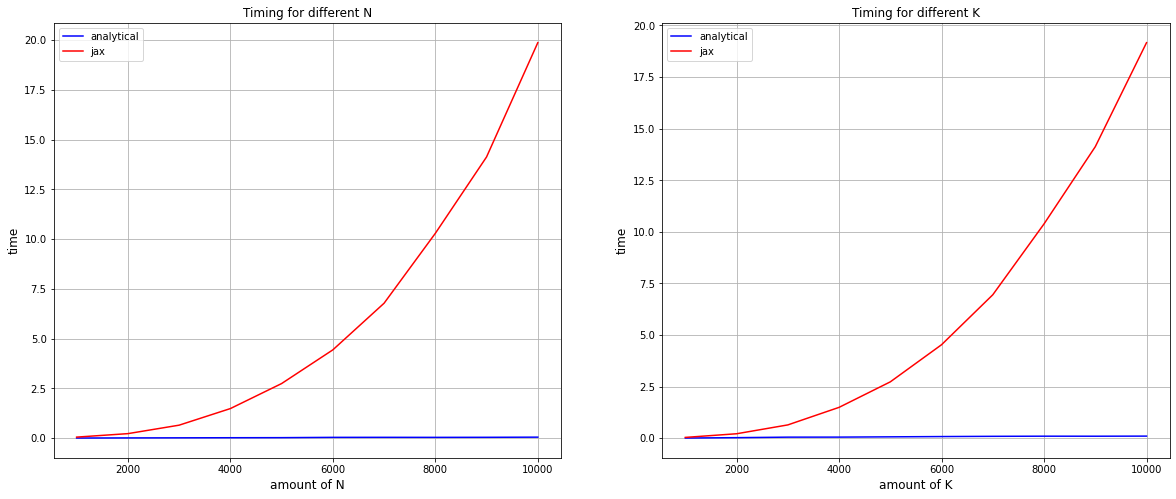

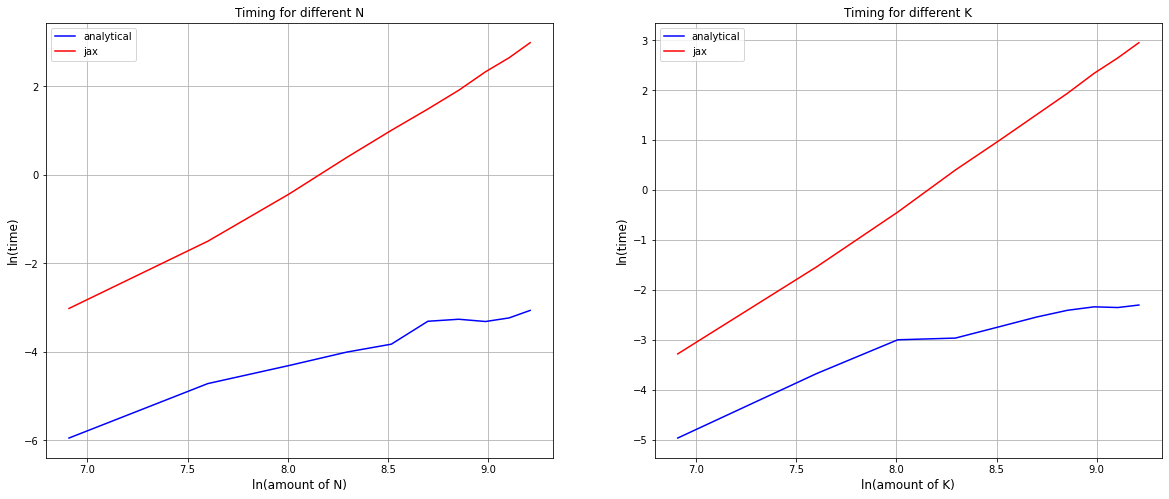

In [144]:
x = n_arr

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.title('Timing for different N')
plt.plot(x, time_band_lu_3_diag, color='blue', label='analytical')
plt.plot(x, time_library_lu_3_diag, color='red', label='jax')
plt.ylabel(f"time", fontsize=12)
plt.xlabel(f"amount of N", fontsize=12)

plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Timing for different K')
plt.plot(x, time_band_lu_5_diag, color='blue', label='analytical')
plt.plot(x, time_library_lu_5_diag, color='red', label='jax')
plt.ylabel(f"time", fontsize=12)
plt.xlabel(f"amount of K", fontsize=12)

plt.legend()
plt.grid()

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.title('Timing for different N')
plt.plot(np.log(x), np.log(time_band_lu_3_diag), color='blue', label='analytical')
plt.plot(np.log(x), np.log(time_library_lu_3_diag), color='red', label='jax')
plt.ylabel(f"ln(time)", fontsize=12)
plt.xlabel(f"ln(amount of N)", fontsize=12)

plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Timing for different K')
plt.plot(np.log(x), np.log(time_band_lu_5_diag), color='blue', label='analytical')
plt.plot(np.log(x), np.log(time_library_lu_5_diag), color='red', label='jax')
plt.ylabel(f"ln(time)", fontsize=12)
plt.xlabel(f"ln(amount of K)", fontsize=12)
plt.legend()
plt.grid()
plt.show()

$LU$ decomposition in ```scipy``` works in $O(n^3)$ complexity time and our solution needs only $O(n)$ complexity time. That's why our solution much faster, it uses special structure of matrix.



- (7 pts) Write a function ```cholesky(n)``` for computing Cholesky decomposition. It should take the the single argument - the matrix that will be factorized and return the single output - lower-triangular factor $L$. Think about the efficiency of your implementation and if necessary update it to achieve the best performance (eliminate Python loops, where it is possible and so on). Explicitly describe the difference with LU decomposition that reduces the complexity from $2n^3/3$ for LU to $n^3/3$ for Cholesky. 
Test the implemented function on the Pascal matrix of given size $n$ for $n = 5, 10, 50$. 
Pascal matrix is square matrix of the following form (here for $n=4$)
$$P = \begin{pmatrix}
1 & 1 & 1 & 1\\
1 & 2 & 3 & 4 \\
1 & 3 & 6 & 10 \\
1 & 4 & 10 & 20 \\
\end{pmatrix}.$$

    [Here](https://en.wikipedia.org/wiki/Pascal_matrix) you can find more details about such matrices and analytical form for factor $L$ from Cholesky decomposition. Compare the result of your implementation with analytical expression in terms of some matrix norm of difference.  

In [181]:
def cholesky(A):
    n = len(A)
    B = A.copy()
    L = np.zeros_like(A)
    for i in range(n):
        L[i, i] = np.sqrt(B[i, i])
        L[i, i + 1:] = B[i, i + 1:] / B[i, i]
        for j in range(i + 1, n):
            B[j, j:] = B[j, j:] - L[i, j] * L[i, j:]
    return L

In [191]:
for j, n in enumerate([5, 10, 20, 30, 40, 50]):
    
    A = pascal(n)
    L = cholesky(A)
    
    A_new = L.T @ L
    diff = np.linalg.norm(A_new - A)
    
    if diff < 1e-6:
        print(f'Pass with {n}')
    else:
        print(f'Step {j+1}: A.shape={(n, n)}, diff={diff}')

Pass with 5
Pass with 10
Pass with 20
Pass with 30
Step 5: A.shape=(40, 40), diff=nan
Step 6: A.shape=(50, 50), diff=nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


We can see that for $n=50$ there is no Cholesky decomposition. The reason for that is that pascal matrix are not positive definite! Let's check it quickly through the library function:

In [193]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [190]:
np.linalg.cholesky(pascal(40))

LinAlgError: ignored

So, we were right! Matrix is not positive definite, so we can not decompose this matrix.

### 2. Stability of LU (8 pts)

* (4 pts) Show, that for these  matrices $A$ and $B$ LU decomposition fails. Why does it happen?



$
A = \begin{pmatrix}
0 & 1 \\
2 & 3
\end{pmatrix}.$ 

$B = \begin{pmatrix}
1 & 1 & 0\\
1 & 1 & 2 \\
1 & 2 & 1
\end{pmatrix}.$ 

We know that LU decomposition is true only for ыtrictly regular matrices. (the Matrix $A$ is called strictly regular if all the leading major minorities - submatrixes from the first $k$ rows and $k$ columns - are not degraded). In the first case (matrix A) there are zero on the [0,0] element of the matrix. Thus, leading minor of element [1,1] will be zero. Thus, LU decomposition will fail: $M_{1,1}=0$

For matrix B leading minor of the element [2,2] will be zero
$B = \begin{pmatrix}
1 & 1 & 0\\
1 & 1 & 2 \\
1 & 2 & 1
\end{pmatrix}.$ 
$M_{2,2} =\begin{vmatrix}1 & 1 \\
1 & 1 \end{vmatrix}. = 1 \cdot 1-1 \cdot 1=0
$



* (4 pts) In the LU decomposition, a pivot position is a position of the element that identifies the row and column that will be eliminated in the current step. For example, first pivot in LU is usually the left top element. What value of $c$ leads to zero in the second pivot position? What $c$ produces zero in the third pivot position? What modification of LU should we use in order to address the possible zeros in pivot position?

$A = \begin{pmatrix}
1 & c & 0\\
2 & 4 & 1 \\
3 & 5 & 1
\end{pmatrix}.$ 

$
A = \begin{pmatrix}
1 & c & 0\\
2 & 4 & 1 \\
3 & 5 & 1
\end{pmatrix}
\sim
\begin{pmatrix}
1 & c & 0\\
0 & 4-2c & 1 \\
0 & 5-3c & 1
\end{pmatrix} \Longrightarrow c =2$ give 0 in the second pivot position.

$
\begin{pmatrix}
1 & c & 0\\
0 & 4-2c & 1 \\
0 & 5-3c & 1
\end{pmatrix} 
\sim
\begin{pmatrix}
1 & c & 0\\
0 & 1 & 1/(4-2c) \\
0 & 5-3c & 1
\end{pmatrix}
\sim
\begin{pmatrix}
1 & 0 & -c/(4-2c)\\
0 & 1 & 1/(4-2c) \\
0 & 5-3c & 1
\end{pmatrix}
\sim
\begin{pmatrix}
1 & 0 & -c/(4-2c)\\
0 & 1 & 1/(4-2c) \\
0 & 0 & 1-(5-3c)/(4-2c)
\end{pmatrix} \Longrightarrow $
$$$$
$
1-(5-3c) / (4-2c) = 0 \Longrightarrow c=1
$ 
will give zero in the third pivot position.

In [ ]:
# Your solution is here

### 3. Implementation of PLU decomposition (14 pts)

As you have noticed before, LU decomposition may fail. In order to make it stable, we can use LU decomposition with pivoting  (PLU).

We want to find such permutation matrix $P$ that LU decomposition of $PA$ exists

$$ PA = LU $$

- (7 pts) Implement efficiently PLU decomposition (without loops and with appropriate level of BLAS operations).  Also, pay attention to the way of permutation matrix storage.

- (4 pts ) Compare your function for computing PLU with built-in function on matrices of such type ```(mirror_diag = [1,2,1], n = 4)```. (Bandwidth and matrix size may vary). So, you can pass them as dense 2D NumPy array and do not tune your implementation to this special structure. Compare them in terms of running time (use ```%timeit``` magic) for range of dimensions to recover the asymptotic rate of time increasing and in terms of acuracy. We expect you plot the running time vs matrix dimension for built-in function and your implementation. So you should get the plot with two lines.
Consider additionally one of the pathological examples from above, where LU fails, but PLU has to work.


$$A = \begin{pmatrix}
0 & 0 & 1 & 1 \\
 0 &1 & 2 & 1  \\
 1 & 2 & 1  & 0\\
1 & 2  & 0 & 0  \\
\end{pmatrix}.$$


- (3 pts) Discuss the obtained results and explain how is it possible to accelerate computing the PLU factorization. 

NumPy or JAX are both ok in this problem, but please use the single library for all implementations. 

In [ ]:
# Your solution is here

### 4. Block LU (10 pts)

Let $A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix}$ be a block matrix. The goal is to solve the linear system

$$
     \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}.
$$

* (2 pts) Using block elimination find matrix $S$ and right-hand side $\hat{f_2}$ so that $u_2$ can be found from $S u_2 = \hat{f_2}$. Note that the matrix $S$ is called <span style="color:red">Schur complement</span> of the block $A_{11}$.
* (4 pts) Using Schur complement properties prove that 

$$\det(X+AB) = \det(X)\det(I+BX^{-1}A), $$


where $X$ - nonsingular square matrix.
* (4 pts) Let matrix $F \in \mathbb{R}^{m \times n}$ and $G \in \mathbb{R}^{n \times m}$. Prove that 

$$\det(I_m - FG) = \det(I_n - GF).$$

* (2 pts) Using block elimination find matrix $S$ and right-hand side $\hat{f_2}$ so that $u_2$ can be found from $S u_2 = \hat{f_2}$. Note that the matrix $S$ is called Schur complement </font> of the block $A_{11}$.



Suppose matrix $A_{11}$ is invertible. So, our system equivalent to the following:
$$$$
$
\begin{cases}
A_{11}u_1 + A_{12}u_2 = f_1 \\
A_{21}u_1 + A_{22}u_2 = f_2
\end{cases} \sim 
\begin{cases}
u_1 + A_{11}^{-1}A_{12}u_2 = A_{11}^{-1}f_1 \\
A_{21}u_1 + A_{22}u_2 = f_2
\end{cases}
\sim
\begin{cases}
u_1 = A_{11}^{-1}f_1 - A_{11}^{-1}A_{12}u_2 \\
A_{21}u_1 + A_{22}u_2 = f_2
\end{cases}\sim\\
\sim 
\begin{cases}
u_1 = A_{11}^{-1}f_1 - A_{11}^{-1}A_{12}u_2 \\
A_{21}A_{11}^{-1}f_1 - A_{21}A_{11}^{-1}A_{12}u_2 + A_{22}u_2 = f_2
\end{cases}
\sim 
\begin{cases}
u_1 = A_{11}^{-1}f_1 - A_{11}^{-1}A_{12}u_2 \\
\bigl(A_{22} - A_{21}A_{11}^{-1}A_{12}\bigr)u_2 = f_2 - A_{21}A_{11}^{-1}f_1
\end{cases}.
$
$$$$
So, we get that
$
S = A_{22} - A_{21}A_{11}^{-1}A_{12}, \hat{f_2} = f_2 - A_{21}A_{11}^{-1}f_1.
$


* (4 pts) Let matrix $F \in \mathbb{R}^{m \times n}$ and $G \in \mathbb{R}^{n \times m}$. Prove that 

$$\det(I_m - FG) = \det(I_n - GF).$$


Let the matrix $A = \begin{pmatrix} E & F \\ G & H \end{pmatrix}$, then

From on side:

${\begin{pmatrix} E & F \\ G & H \end{pmatrix}} = {\begin{pmatrix} E & 0 \\ G & I \end{pmatrix}} {\begin{pmatrix} I & E^{-1}F \\ 0 & H - GE^{-1}F \end{pmatrix}}
\Longrightarrow
\det{\begin{pmatrix} E & F \\ G & H \end{pmatrix}} = \det(E)\det(H-GE^{-1}F)$

From the other side:

${\begin{pmatrix} E & F \\ G & H \end{pmatrix}} = {\begin{pmatrix} I & F \\ 0 & H \end{pmatrix}} {\begin{pmatrix}  E - FH^{-1}G & 0 \\ H^{-1} G & I \end{pmatrix}}
\Longrightarrow
\det(A) = \det{\begin{pmatrix} E & F \\ G & H \end{pmatrix}} = \det(H)\det(E-FH^{-1}G)$
$$$$
Let $E = I_m, H = I_n$, then

$\det(A) = \det{\begin{pmatrix} E & F \\ G & H \end{pmatrix}} = \det(I_m)\det(I_n-GI_m^{-1}F) = \det(I_n - GF)$

$\det(A) = \det{\begin{pmatrix} E & F \\ G & H \end{pmatrix}} = \det(I_n)\det(I_m-FI_n^{-1}G) = \det(I_m - FG)$

So, we obtain
$$ \det(I_m - FG) = \det(I_n - GF)$$

* (4 pts) Using Schur complement properties prove that 

$$\det(X+AB) = \det(X)\det(I+BX^{-1}A), $$


where $X$ - nonsingular square matrix.

Using previous proof:

Let matrix $W = \begin{bmatrix} X & A \\ -B & I \end{bmatrix}$
$$$$
$
     W = \begin{bmatrix} X & A \\ -B & I \end{bmatrix}  = \begin{bmatrix} X & 0 \\ 0 & I \end{bmatrix} \begin{bmatrix} I & 0 \\ -B & I \end{bmatrix}\begin{bmatrix} I & X^{-1} A \\ 0 & I + B X^{-1}A \end{bmatrix}
\Longrightarrow
\det (X + AB ) =  \det(X) \det (I + B X^{-1} A)$

## Problem 2 (eigenvalues)  (50 pts)

### 1. Theoretical tasks (15 pts)

* (2 pts) Prove that eigenvectors that correspond to distinct eigenvalues are linearly independent.


* Prove that eigenvectors that correspond to distinct eigenvalues are linearly independent.

Proof:

Let k be the smallest positive integer such that $v_1, v_2, . . . , v_k$ are linearly independent, k < p, then $v_{k+1}$ is a linear combination of $v_1, . . . , v_k$; that is, there exist constants $\alpha_1,\alpha_2,...,\alpha_k$ such that

$v_{k+1} = \alpha_1v_1 + ... + \alpha_k v_k$

Applying the matrix A to both sides, we have:

$A v_{k+1} = \lambda_{k+1} v_{k+1} = \alpha_1 \lambda_1 v_1 + ... + \alpha_k \lambda_k v_k$

$\alpha_1 \lambda_{k+1} v_1 + ... + \alpha_k \lambda_{k+1} v_k = \alpha_1 \lambda_1 v_1 + ... + \alpha_k \lambda_k v_k$

$\alpha_1 (\lambda_{k+1} - \lambda_1)v_1 + ... + \alpha_k (\lambda_{k+1} - \lambda_k)v_k = 0$

We now that $v_1, ..., v_k$ are linearly independent and eigenvalues are different. So, we have that

$\alpha_1 = ... = \alpha_k = 0$

It means that $v_{k+1} = 0\Longrightarrow $  contradiction.








* (3 pts) $A$ is a matrix such that $a_{i,j} \ge 0$ and $\sum_{j}a_{i,j} = 1$ (sum of the elements in each row is 1). Prove that $A$ has an eigenvalue $\lambda=1$ and that any eigenvalue $\lambda_i$: $|\lambda_i| \le 1$.

*  $A$ is a matrix such that $a_{i,j} \ge 0$ and $\sum_{j}a_{i,j} = 1$ (sum of the elements in each row is 1). Prove that $A$ has an eigenvalue $\lambda=1$ and that any eigenvalue $\lambda_i$: $|\lambda_i| \le 1$.

Proof

This matrix is called Markov matrix

Since each column of A sums to 1, each column of 𝐴−𝐼 sums to 0.

This means that the sum of the rows (linear combination with coefficients all equal to 1), is the zero vector. If there is a linear combination of row vectors with not all zero coefficients, then the rows are linearly dependent, and any matrix with linearly dependent rows (or columns) must have determinant 0.

Thus, $\mathrm{det(𝐴−𝐼)=0}$ and $ \mathrm{det(𝐴−\lambda_1 𝐼)=0} $
 
so by definition, $𝜆_1=1$ is an eigenvalue.

Second part:

Let \lambda be an eigenvalue of the stochastic matrix A and let v be a corresponding eigenvector.
That is, we have $Av = λv$

Comparing the i-th row of the both sides, we obtain
$a_{i1}v_1+a_{i2}v_2+ ... +a_{in}v_n=\lambda v_i$ for i=1,…,n

Let $|v_k|=max{|v_1|,|v_2|,…,|v_n|}$,

namely $v_k$ is the entry of v that has the maximal absolute value.

Note that $|v_k|>0$ since otherwise we have $v=0$ and this contradicts that an eigenvector is a nonzero vector.

Then, we have by triangle inequality and $v_k$ is maximal:

$$|\lambda v_k| = |a_{k1}v_1+a_{k2}v_2+ ... +a_{kn}v_n| \le a_{k1}|v_1|+a_{k2}|v_2|+ ... +a_{kn}|v_n| \le a_{k1}|v_k|+a_{k2}|v_k|+ ... +a_{kn}|v_k| = (a_{k1} + .. + a{kn}) |v_k| = |v_k| $$


$|v_k| > 0$

So, $$\lambda_i \le 1$$



* (5 pts) Prove that normal matrix is Hermitian iff its eigenvalues are real. Prove that normal matrix is unitary iff its eigenvalues satisfy $|\lambda| = 1$. 

From lectures we know:

**Theorem**: $A$ is a **normal matrix**, iff $A = U \Lambda U^*$, where $U$ is unitary and $\Lambda$ is diagonal. 

So, $A$ is Hermittian $(A^* = A )\Longleftrightarrow $ 

$
U\Lambda^* U^* = U\Lambda U^* \Longleftrightarrow \Lambda^* U^* = \Lambda U^* \Longleftrightarrow \Lambda^* = \Lambda \Longleftrightarrow \lambda_i = \lambda_i^* \; \Longleftrightarrow \lambda_i \in \mathbb{R}.
$

And $A$ is unitary $(AA^* = I)\Longleftrightarrow $

$
U\Lambda U^*U\Lambda^* U^* = I \Longleftrightarrow U\Lambda\Lambda^* U^* = I
\Longleftrightarrow \Lambda\Lambda^* U^* = U^* \Longleftrightarrow 
$
$
\Longleftrightarrow\Lambda\Lambda^* = I \Longleftrightarrow |\lambda_i|^2 = 1 \Longleftrightarrow |\lambda_i| = 1 \; 
$



* (5 pts) The following problem illustrates instability of the Jordan form. Find theoretically the eigenvalues of the perturbed Jordan block (there is only one $\varepsilon$ - in the left lower corner):

$$
    J(\varepsilon) = 
    \begin{bmatrix} 
     \lambda & 1 & & & 0 \\ 
     0 & \lambda & 1 & & \\ 
     & 0 & \ddots & \ddots & \\ 
     & & 0 & \lambda & 1 \\ 
     \varepsilon & & & 0 & \lambda  \\ 
    \end{bmatrix}_{n\times n}
$$

   Comment how eigenvalues of $J(0)$ are perturbed for large $n$.

Let's find eigenvalues of $J(\varepsilon)$:
$$
\operatorname{det}(J(\varepsilon) - vI) = 
    \begin{vmatrix} 
     \lambda - v & 1 & & & 0 \\ 
     & \lambda - v & 1 & & \\ 
     &  & \ddots & \ddots & \\ 
     & & & \lambda - v & 1 \\ 
     \varepsilon & & & & \lambda - v  \\ 
    \end{vmatrix}_{n\times n} =
$$

$$
= (\lambda - v)\begin{vmatrix} 
     \lambda - v & 1 & & & 0 \\ 
     0 & \lambda - v & 1 & & \\ 
     & 0 & \ddots & \ddots & \\ 
     & & \ddots & \lambda - v & 1 \\ 
     0 & & & 0 & \lambda - v  \\ 
    \end{vmatrix}_{(n - 1) \times (n - 1)}~+~(-1)^{(n+1)} \varepsilon \begin{vmatrix} 
     1 & 0 & & & 0 \\ 
     \lambda - v & 1 & 0 & & \\ 
     & \ddots & \ddots & \ddots & \\ 
     & & \lambda - v & 1 & 0 \\ 
     0 & & & \lambda - v & 1  \\ 
    \end{vmatrix}_{(n - 1)\times (n - 1)} = 
$$

$=(\lambda - v)^n~-~(-1)^n\varepsilon=0$, where $v$ is eigenvalue of $J(\varepsilon)$.

Equation for eigenvalues:
$$
(\lambda - v)^n - (-1)^n\varepsilon = 0 \Longleftrightarrow (v - \lambda)^n = (-1)^n\varepsilon\Longleftrightarrow (v - \lambda)^n = \varepsilon.
$$
Consider two possible situation:

1. If $n$ is even, this equation has $\frac{n}{2}$ roots $v_{1, n} = \lambda + \varepsilon^{\frac{1}{n}}$ and $\frac{n}{2}$ roots $v_{2, n} = \lambda - \varepsilon^{\frac{1}{n}}$. 

2. If $n$ is odd, this equation has $n$ identical roots $v_{n} = \lambda + \varepsilon^{\frac{1}{n}}$. 

We suggest that $\varepsilon > 0\Longrightarrow\lim\limits_{n \to \infty} \varepsilon^{\frac{1}{n}}= 1$. That means that $\lambda_{perturbed} \approx \lambda + 1$ for odd $n$ and $\lambda_{perturbed} \approx \lambda \pm 1$ for even $n$.

### 2. PageRank (35 pts)


#### Damping factor importance

* (5 pts) Write the function ```pagerank_matrix(G)``` that takes an adjacency matrix $G$ (in both sparse and dense formats) as an input and outputs the corresponding PageRank matrix $A$.

In [196]:
from scipy.sparse import csr_matrix

In [195]:
# INPUT:  G - np.ndarray or sparse matrix
# OUTPUT: A - np.ndarray (of size G.shape) or sparse matrix
def pagerank_matrix(G):
    # enter your code here
    sum_cols = np.array(G.T.sum(axis=0), dtype = float).ravel()
    sum_cols[sum_cols > 0] = 1 / sum_cols[sum_cols > 0]
    indxes = np.arange(G.shape[0])
    return G.T @ csr_matrix((sum_cols, (indxes, indxes)), shape=(G.shape), dtype = float)

* (3 pts) Find PageRank matrix $A$ that corresponds to the following graph: <img src="graph.png" width='250'>
What is its largest eigenvalue? What multiplicity does it have?

In [197]:
G = np.array([[0, 1, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [1, 1, 0, 0, 0],
              [0, 0, 0, 0, 1],
              [0, 0, 0, 1, 0]], dtype='float')

In [198]:
A = pagerank_matrix(G)
A

array([[0. , 0. , 0.5, 0. , 0. ],
       [1. , 0. , 0.5, 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 1. , 0. ]])

In [248]:
print('Eigenvalues is ', np.linalg.eigvals(A))

Eigenvalues is  [-0.5+0.5j -0.5-0.5j  1. +0.j  -0.5+0.j   1. +0.j ]


So, we can see that the largest eigenvalue is $1$ with multiplicity $= 2$.




* (5 pts) Implement the power method for a given matrix $A$, an initial guess $x_0$ and a number of iterations ```num_iter```. It should be organized as a function ```power_method(A, x0, num_iter)``` that outputs approximation to eigenvector $x$, eigenvalue $\lambda$ and history of residuals $\{\|Ax_k - \lambda_k x_k\|_2\}$. Make sure that the method converges to the correct solution on a matrix $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$ which is known to have the largest eigenvalue equal to $3$.

In [237]:
# INPUT:  A - np.ndarray (2D), x0 - np.ndarray (1D), num_iter - integer (positive)
# OUTPUT: x - np.ndarray (of size x0), l - float, res - np.ndarray (of size num_iter + 1 [include initial guess])
def power_method(A, x0, num_iter): # 5 pts
    # enter your code here
    res = np.zeros(num_iter + 1)
    x_i = x0.copy()
    for i in range(num_iter + 1):
        x_i /= np.linalg.norm(x_i)
        l = (A @ x_i).T @ x_i
        res[i] = np.linalg.norm(A @ x_i - l * x_i)
        x_i = A @ x_i
    return x_i, l, res

In [238]:
A = np.array([[2,-1], [-1,2]])
x0 = np.random.rand(2)
x, l, res = power_method(A, x0, 100)
print(l)

3.0


In [239]:
len(res)

101

* (2 pts) Run the power method for the graph presented above and plot residuals $\|Ax_k - \lambda_k x_k\|_2$ as a function of $k$ for ```num_iter=100``` and random initial guess ```x0```.  Explain the absence of convergence. 



In [225]:
x, l, res = power_method(pagerank_matrix(G), np.random.rand(G.shape[0]), 100)

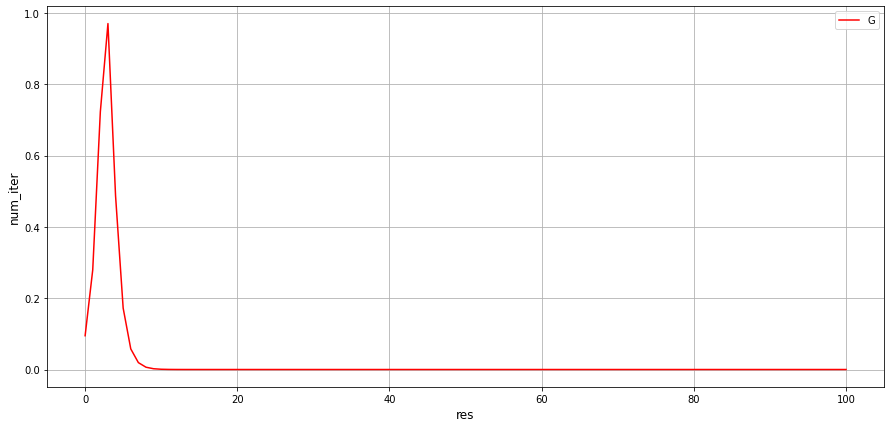

In [244]:
plt.figure(figsize=(15, 7))
plt.plot(res, color='red', label='G')
plt.ylabel(f"num_iter", fontsize=12)
plt.xlabel(f"res", fontsize=12)
plt.legend()
plt.grid()
plt.show()

The matrix has maximum eigenvalue $\lambda_{max} = 1$ with multiplicity = $2$. So, the method converges to the vector from subspace of eigenvectors, which are related to the eigenvalue.

* (2 pts) Consider the same graph, but with additional self loop at node 4 (self loop is an edge that connects a vertex with itself). Plot residuals as in the previous task and discuss the convergence. Now, run the power method with ```num_iter=100``` for 10 different initial guesses and print/plot the resulting approximated eigenvectors. Why do they depend on the initial guess?



In order to avoid this problem Larry Page and Sergey Brin [proposed](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) to use the following regularization technique:

$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$

where $d$ is a small parameter in $[0,1]$ (typically $d=0.85$), which is called **damping factor**, $A$ is of size $N\times N$. Now $A_d$ is the matrix with multiplicity of the largest eigenvalue equal to 1. 
Recall that computing the eigenvector of the PageRank matrix, which corresponds to the largest eigenvalue, has the following interpretation. Consider a person who stays in a random node of a graph (i.e. opens a random web page); at each step s/he follows one of the outcoming edges uniformly at random (i.e. opens one of the links). So the person randomly walks through the graph and the eigenvector we are looking for is exactly his/her stationary distribution â€” for each node it tells you the probability of visiting this particular node. Therefore, if the person has started from a part of the graph which is not connected with the other part, he will never get there.  In the regularized model, the person at each step follows one of the outcoming links with probability $d$ OR teleports to a random node from the whole graph with probability $(1-d)$.

So, now we have
$
G =
\begin{bmatrix} 
     0 & 1 & 0 & 0 & 0 \\ 
     0 & 0 & 1 & 0 & 0 \\ 
     1 & 1 & 0 & 0 & 0 \\ 
     0 & 0 & 0 & 0 & 1 \\ 
     0 & 0 & 0 & 1 & 1  \\ 
\end{bmatrix}.
$

In [250]:
G = np.array([[0, 1, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [1, 1, 0, 0, 0],
              [0, 0, 0, 0, 1],
              [0, 0, 0, 1, 1]])

In [251]:
A = pagerank_matrix(G)
A

array([[0. , 0. , 0.5, 0. , 0. ],
       [1. , 0. , 0.5, 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5],
       [0. , 0. , 0. , 1. , 0.5]])

In [252]:
print('Eigenvalues is ', np.linalg.eigvals(A))

Eigenvalues is  [-0.5+0.5j -0.5-0.5j  1. +0.j  -0.5+0.j   1. +0.j ]


Matrix $A$ also has maximum eigenvalue $\lambda_{max} = 1$ with multiplicity = $2$, that means there are $2$ eigenvectors correspond to this eigenvalue.

In [253]:
for i in range(10):
    x0 = np.random.rand(A.shape[1])
    x, l, res = power_method(A, x0, 100)
    print(f"Iter = {i + 1}, eigenvector = {x}")

Iter = 1, eigenvector = [0.27933264 0.55866529 0.55866529 0.24403257 0.48806513]
Iter = 2, eigenvector = [0.17313639 0.34627278 0.34627278 0.3821555  0.76431099]
Iter = 3, eigenvector = [0.27584062 0.55168124 0.55168124 0.25108069 0.50216138]
Iter = 4, eigenvector = [0.28854097 0.57708193 0.57708193 0.22391829 0.44783657]
Iter = 5, eigenvector = [0.19918463 0.39836926 0.39836926 0.35858872 0.71717744]
Iter = 6, eigenvector = [0.29066927 0.58133854 0.58133854 0.21890746 0.43781492]
Iter = 7, eigenvector = [0.33147493 0.66294987 0.66294987 0.04715785 0.09431571]
Iter = 8, eigenvector = [0.18796105 0.3759221  0.3759221  0.3693334  0.73866679]
Iter = 9, eigenvector = [0.24392591 0.48785182 0.48785182 0.30479546 0.60959092]
Iter = 10, eigenvector = [0.14171275 0.28342549 0.28342549 0.40478574 0.80957148]


Suppose on iteration $i$ we have $A^{i}\hat{x} = a_1v_1 + a_2v_2$, where $v_1$ and $v_2$ corresponds to the same eigenvalue $\lambda_{max} = 1$. So, on $i + k$ iteration we will have  $A^{i + k}\hat{x} = \lambda_{max}^{k}(a_1v_1 + a_2v_2)$ So, during this method $\lambda$ still converges to the biggest eigenvalue of $A$, but to the vector that is in the subspace spanned by the eigenvectors $v_1$ and $v_2$. That's why obtained eigenvectors depends on the initialization of $x_0$ and vector $A^ix_0$ behavior for small $i$.



* (2 pts) Now, run the power method with $A_d$ and plot residuals $\|A_d x_k - \lambda_k x_k\|_2$ as a function of $k$ for $d=0.97$, ```num_iter=100``` and a random initial guess ```x0```.

In [264]:
G = np.array([[0, 1, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [1, 1, 0, 0, 0],
              [0, 0, 0, 0, 1],
              [0, 0, 0, 1, 0]])

In [265]:
A = pagerank_matrix(G)
A

array([[0. , 0. , 0.5, 0. , 0. ],
       [1. , 0. , 0.5, 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 1. , 0. ]])

In [266]:
d = 0.97
Ad = d * A + (1 - d) / A.shape[0] * np.ones((A.shape[0], A.shape[1]))

x0 = np.random.rand(Ad.shape[1])
x, l, res = power_method(Ad, x0, 100)

Power method, eigenvalue = 0.999971034622634
Power method, last residual = 0.006205531055102214


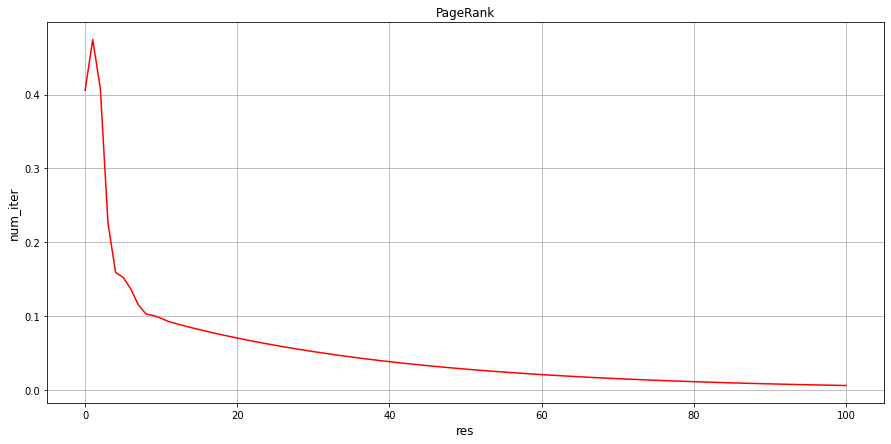

In [269]:
print('Power method, eigenvalue = {0}'.format(l))
print('Power method, last residual = {0}'.format(res[-1]))
plt.figure(figsize=(15, 7))
plt.title("PageRank")
plt.plot(res, color='red', label='G')
plt.grid()
plt.ylabel(f"num_iter", fontsize=12)
plt.xlabel(f"res", fontsize=12)
plt.show()


* (5 pts) Find the second largest in the absolute value eigenvalue of the obtained matrix $A_d$. How and why is it connected to the damping factor $d$? What is the convergence rate of the PageRank algorithm when using damping factor?

Usually, graphs that arise in various areas are sparse (social, web, road networks, etc.) and, thus, computation of a matrix-vector product for corresponding PageRank matrix $A$ is much cheaper than $\mathcal{O}(N^2)$. However, if $A_d$ is calculated directly, it becomes dense and, therefore, $\mathcal{O}(N^2)$ cost grows prohibitively large for  big $N$.

If $y^T$ is the left eigenvector of $A$ with eigenvalue $\frac{\lambda}{d}$, then it is also the left eigenvector of $A_d$ with eigenvalue $\lambda = \nu d$. Thus, the second greatest eigenvalue of PageRank with damping is $\nu d$, where $\nu = \lambda_2(A)$ - the second largest eigenvalue of $A$. For our case we have $d = 0.97$. As it follows, the (linear) convergence rate is $\nu d$ or $0.97$ in our case.

Inspired by this [article](http://www-cs-students.stanford.edu/~taherh/papers/secondeigenvalue.pdf).

Of course we can check it explicitly:

In [270]:
np.sort(np.abs(np.linalg.eigvals(Ad)))[-2]

0.97

* (2 pts) Implement fast matrix-vector product for $A_d$ as a function ```pagerank_matvec(A, d, x)```, which takes a PageRank matrix $A$ (in sparse format, e.g., ```csr_matrix```), damping factor $d$ and a vector $x$ as an input and returns $A_dx$ as an output. 

* (1 pts) Generate a random adjacency matrix of size $10000 \times 10000$ with only 100 non-zero elements and compare ```pagerank_matvec``` performance with direct evaluation of $A_dx$.

In [271]:
# INPUT:  A - np.ndarray (2D), d - float (from 0.0 to 1.0), x - np.ndarray (1D, size of A.shape[0/1])
# OUTPUT: y - np.ndarray (1D, size of x)
def pagerank_matvec(A, d, x): # 2 pts
    # enter your code here
    z = x.sum() * np.ones(x.shape[0])
    y = d*(A @ x) + z*(1 - d)/A.shape[0]
    return y

In [272]:
while(1):
    positions_i =  np.random.randint(10000, size=100)
    positions_i = list(set(positions_i))
    if len(positions_i) == 100:
        break
while(1):
    positions_j =  np.random.randint(10000, size=100)
    positions_j = list(set(positions_j))
    if len(positions_j) == 100:
        break
        
G = csr_matrix((np.ones(100), (np.array(positions_i), np.array(positions_j))), shape=(10000, 10000))

In [278]:
A = pagerank_matrix(G)
d = 0.97
x0 = np.random.rand(A.shape[1])

In [293]:
t = time.time()
Ad = d * A + (1 - d) / A.shape[0] * np.ones(A.shape)
ans_1 = Ad @ x0
time.time() - t

0.7846746444702148

In [292]:
t = time.time()
ans_2 = pagerank_matvec(A, d, x0)
time.time() - t

0.002492666244506836

We can see that our function pagerank_matvec is extremely faster!

#### DBLP: computer science bibliography

Download the dataset from [here](https://goo.gl/oZVxEa), unzip it and put `dblp_authors.npz`  and `dblp_graph.npz` in the same folder with this notebook. Each value (author name) from `dblp_authors.npz` corresponds to the row/column of the matrix from `dblp_graph.npz`. Value at row `i` and column `j` of the matrix from `dblp_graph.npz` corresponds to the number of times author `i` cited papers of the author `j`. Let us now find the most significant scientists according to PageRank model over DBLP data.

* (4 pts) Load the weighted adjacency matrix and the authors list into Python using ```load_dblp(...)``` function. Print its density (fraction of nonzero elements). Find top-10 most cited authors from the weighted adjacency matrix. Now, make all the weights of the adjacency matrix equal to 1 for simplicity (consider only existence of connection between authors, not its weight). Obtain the PageRank matrix $A$ from the adjacency matrix and verify that it is stochastic.
 
 
* (1 pts) In order to provide ```pagerank_matvec``` to your ```power_method``` (without rewriting it) for fast calculation of $A_dx$, you can create a ```LinearOperator```: 
```python
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))
```
Calling ```L@x``` or ```L.dot(x)``` will result in calculation of ```pagerank_matvec(A, d, x)``` and, thus, you can plug $L$ instead of the matrix $A$ in the ```power_method``` directly. **Note:** though in the previous subtask graph was very small (so you could disparage fast matvec implementation), here it is very large (but sparse), so that direct evaluation of $A_dx$ will require $\sim 10^{12}$ matrix elements to store - good luck with that (^_<).


* (2 pts) Run the power method starting from the vector of all ones and plot residuals $\|A_dx_k - \lambda_k x_k\|_2$  as a function of $k$ for $d=0.85$.


* (1 pts) Print names of the top-10 authors according to PageRank over DBLP when $d=0.85$. Comment on your findings.

In [ ]:
from scipy.sparse import load_npz
import numpy as np
def load_dblp(path_auth, path_graph):
    G = load_npz(path_graph).astype(float)
    with np.load(path_auth) as data: authors = data['authors']
    return G, authors
G, authors = load_dblp('dblp_authors.npz', 'dblp_graph.npz')

In [ ]:
# Your code is here

## Problem 3. QR algorithm (33 pts)

* Implement QR-algorithm without shifts. Prototype of the function is given below

In [ ]:
# INPUT: 
# A_init - square matrix, 
# num_iter - number of iterations for QR algorithm
# OUTPUT: 
# Ak - transformed matrix A_init given by QR algorithm, 
# convergence - numpy array of shape (num_iter, ), 
# where we store the maximal number from the Chebyshev norm 
# of triangular part of the Ak for every iteration
def qr_algorithm(A_init, num_iter): # 3 pts
    # enter your code here
    Ak = A_init
    convergence = [0] * num_iter
    convergence[0] = np.linalg.norm(Ak, ord=np.inf) # inf means Chebyshev norm 
    for k in range(1, num_iter):
        Qk, Rk = np.linalg.qr(Ak)
        Ak = Rk.dot(Qk)
        convergence[k] = np.linalg.norm(Ak, ord=np.inf)
    return Ak, convergence

#### Symmetric case (3 pts)
- Create symmetric tridiagonal $11 \times 11$ matrix with elements $-1, 2, -1$ on sub-, main- and upper diagonal respectively without using loops.
- Run $400$ iterations of the QR algorithm for this matrix.
- Plot the output matrix with function ```plt.spy(Ak, precision=1e-7)```.
- Plot convergence of QR-algorithm.

In [ ]:
n = 11
ex = np.ones(n)
A = spsp.spdiags(np.vstack((-ex,  2*ex, -ex)), [-1, 0, 1], n, n, 'csr')
num_iter = 400
Ak, convergence = qr_algorithm(A.toarray(), num_iter)

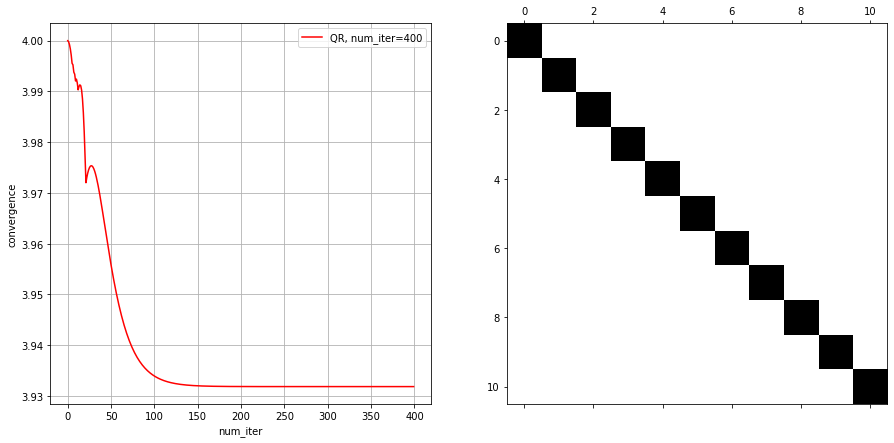

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(convergence, color='red', label=f'QR, num_iter={num_iter}')
plt.ylabel("convergence")
plt.xlabel("num_iter")

plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.spy(Ak, precision=1e-7)
plt.show()

#### Nonsymmetric case (5 pts)

- Create nonsymmetric tridiagonal $11 \times 11$ matrix with elements $5, 3, -2$ on sub-, main- and upper diagonal respectively without using loops.
- Run $250$ iterations of the QR algorithm for this matrix.
- Plot the result matrix with function ```plt.spy(Ak, precision=1e-7)```. Is this matrix lower triangular? How does this correspond to the claim about convergence of the QR algorithm?

In [ ]:
# Your solution is here

In [ ]:
n = 11
ex = np.ones(n)
A = spsp.spdiags(np.vstack((5*ex,  3*ex, -2*ex)), [-1, 0, 1], n, n, 'csr')
num_iter = 250
Ak, convergence = qr_algorithm(A.toarray(), num_iter)

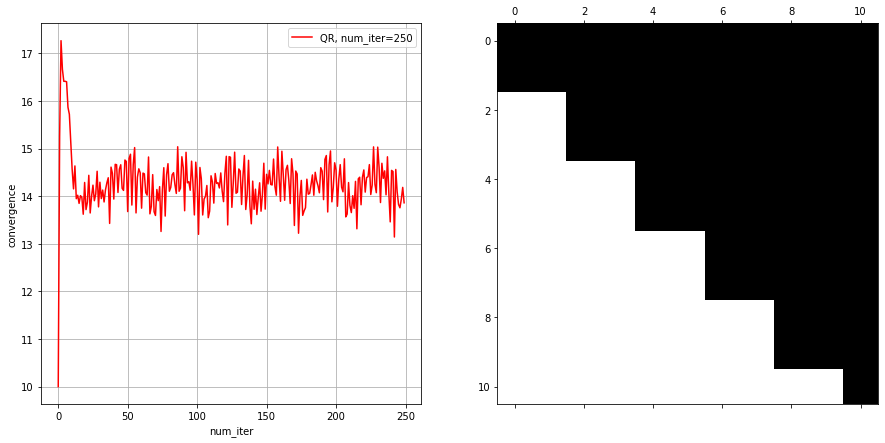

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(convergence, color='red', label=f'QR, num_iter={num_iter}')
plt.ylabel("convergence")
plt.xlabel("num_iter")

plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.spy(Ak, precision=1e-7)
plt.show()

We can see that there is no convergence. The rate of convergence depends on the separation between eigenvalues. So, this affect may be due to that fact that eigenvalues approach each other. Let's check it:

In [ ]:
np.linalg.eigvals(Ak) 

array([3.+6.10905132j, 3.-6.10905132j, 3.+5.47722558j, 3.-5.47722558j,
       3.+4.47213595j, 3.-4.47213595j, 3.+3.16227766j, 3.-3.16227766j,
       3.+1.63691537j, 3.-1.63691537j, 3.+0.j        ])

In [ ]:
np.abs(np.linalg.eigvals(Ak)[0]), np.abs(np.linalg.eigvals(Ak)[1])

(6.805917136998428, 6.805917136998428)

So, we can see that $|\lambda_1| = |\lambda_2|$.

Moreover, QR algorithm can be seen as a more sophisticated variation of the basic "power" eigenvalue algorithm. And from lectures we also know that the convergence ratio for power method is $q^k$, where $q = \left|\frac{\lambda_{2}}{\lambda_{1}}\right| < 1$. 

### QR algorithms with Rayleigh Quotient shift (10 pts)

In the lectures the Rayleigh Quotient shift was introduced to speed up convergence of power method. Here we ask you to generalize this approach to construct the shifts in QR algorithm.

- How to compute the Rayleigh Quotient shift in QR algorithm fast? Provide formulas and explanations how they can be simplified.
- Implement explicit QR algorithm with Rayleigh Quotient shift. Please do not worry about implicit orthogonalization, we want to compare convergence only in terms of iterations.
- Test your implementation in the symmetric case. Plot the convergence of QR algorithm with and without shift. Choose the dimension $n \sim 100 $ for more representative results. 
- How the convergence of the shifted algorithm compares to the simple QR? Why? 

**QR Algorithm:**

We know that $A^{k}=Q^{(k)} \underline{R}^{(k)}$ with
$$
\underline{Q}^{(k)}=\prod_{j=1}^{k} Q^{(j)}=\left[\left.q_{1}^{(k)}\left|q_{2}^{(k)}\right| \cdots\right|q_{m} ^{(k)}\right]
$$

Since the QR algorithm behaves like inverse iteration, introduce shifts $\mu^{(k)}$ to accelerate the convergence:

$$
\begin{aligned}
A^{(k-1)}-\mu^{(k)} I &=Q^{(k)} R^{(k)} \\
A^{(k)} &=R^{(k)} Q^{(k)}+\mu^{(k)} I
\end{aligned}
$$

We then get:

$$
A^{(k)}=\left(Q^{(k)}\right)^{T} A^{(k-1)} Q^{(k)}=\left(\underline{Q}^{(k)}\right)^{T} A \underline{Q}^{(k)}
$$

and:

$$
\left(A-\mu^{(k)} I\right)\left(A-\mu^{(k-1)} I\right) \cdots\left(A-\mu^{(1)} I\right)=\underline{Q}^{(k)} \underline{R}^{(k)}
$$

Shifted simultaneous iteration - last column of $\underline{Q}^{(k)}$ converges quickly

**Choosing μ:**

Natural choice of $\mu^{(k)}:$ Rayleigh quotient for last column of $Q^{(k)}$

$$
\mu^{(k)}=\frac{\left(q_{m}^{(k)}\right)^{T} A q_{m}^{(k)}}{\left(q_{m}^{(k)}\right)^{\top} q_{m}^{(k)}}=\left(q_{m}^{(k)}\right)^{T} A q_{m}^{(k)}
$$

Rayleigh quotient iteration, last column $q_{m}^{(k)}$ converges cubically
Convenient fact: This Rayleigh quotient appears as $m, m$ entry of $A^{(k)}$ since $A^{(k)}=\left(\underline{Q}^{(k)}\right)^{T} A \underline{Q}^{(k)}$
The Rayleigh quotient shift corresponds to setting $\mu^{(k)}=A_{m m}^{(k)}$

**Pseudocode:**

Set $A_{0}=Q_{H}^{T} A Q_{H}=$ upper-Hessenberg 

for $\mathrm{k}=1,2, \ldots$ (until convergence)

$~~~~~\mu_{k} = A_{k-1}[n, n]$

$~~~~~$Compute $A_{k-1}-\mu_{k} I=Q_{k} R_{k}$

$~~~~~\operatorname{Set} A_{k}=R_{k} Q_{k}+\mu_{k} I$ 

end 

Let's implement it

In [ ]:
def qr_algorithm_reileigh(A_init, num_iter): 
    # enter your code here
    Ak = hessenberg(A_init, calc_q=False)
    n = Ak.shape[0]
    convergence = [0] * num_iter
    convergence[0] = np.linalg.norm(Ak, ord=np.inf) # inf means Chebyshev norm 
    for k in range(1, num_iter):
        mu = Ak[n - 1, n - 1]
        Qk, Rk = np.linalg.qr(Ak - mu * np.identity(n))
        Ak = Rk.dot(Qk) + mu * np.identity(n)
        convergence[k] = np.linalg.norm(Ak, ord=np.inf)
    return Ak, convergence

In [ ]:
n = 100
ex = np.ones(n)
A = spsp.spdiags(np.vstack((-1*ex,  2*ex, -1*ex)), [-1, 0, 1], n, n, 'csr')
num_iter = 250
Ak_reileigh, convergence_reileigh = qr_algorithm_reileigh(A.toarray(), num_iter)
Ak, convergence = qr_algorithm(A.toarray(), num_iter)

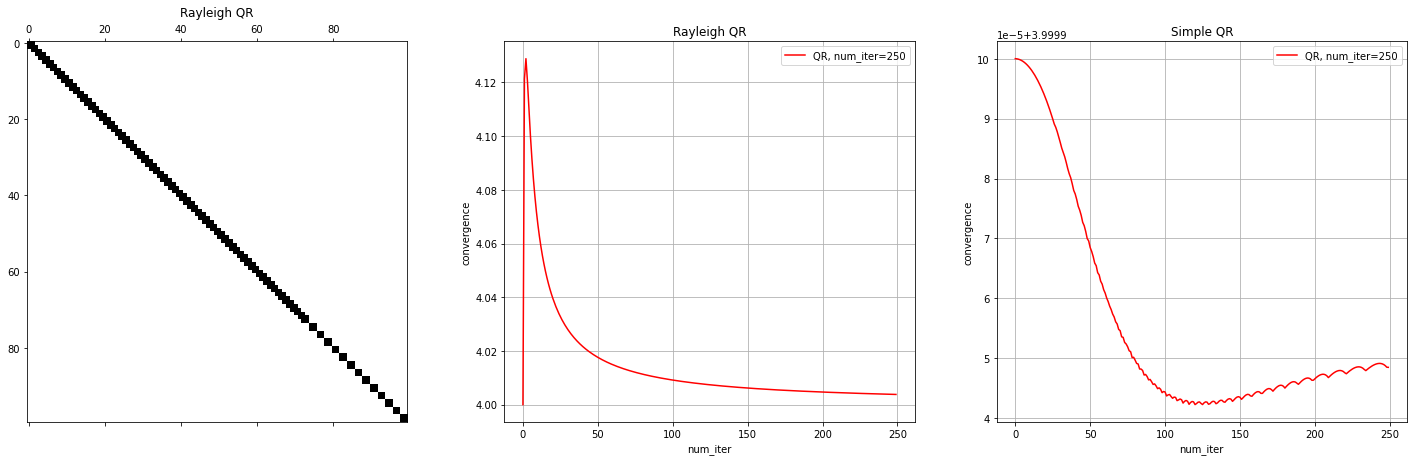

In [ ]:
plt.figure(figsize=(25, 7))

plt.subplot(1, 3, 1)
plt.spy(Ak_reileigh, precision=1e-7)
plt.title("Rayleigh QR")

plt.subplot(1, 3, 2)
plt.plot(convergence_reileigh, color='red', label=f'QR, num_iter={num_iter}')
plt.ylabel("convergence")
plt.xlabel("num_iter")
plt.title("Rayleigh QR")

plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(convergence, color='red', label=f'QR, num_iter={num_iter}')
plt.ylabel("convergence")
plt.xlabel("num_iter")
plt.title("Simple QR")
plt.legend()
plt.grid()

plt.show()

We can see that convergence of shifted Rayleigh algoritm is much better and faster as well. The reason for that is that convergence depends on the *ratio* between the eigenvalues. For example, if $\lambda_{1}, \lambda_{2}$ are two eigenvalues and you shift by $\mu$, then the ratio is $\frac{\lambda_{1}-\mu}{\lambda_{2}-\mu}$. If $\mu$ is close to $\lambda_{1}$, convergence is fast. Exactly as in our case:)


- Try QR with Rayleigh Quotient shift for a simple matrix $A = \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}$. Does anything change from iteration to iteration? Does shift affect convergence here? Why?

In [ ]:
# Your solution is here

In [ ]:
A = np.array([[0, 1], [1, 0]])
num_iter = 250
Ak, convergence = qr_algorithm_reileigh(A, num_iter)

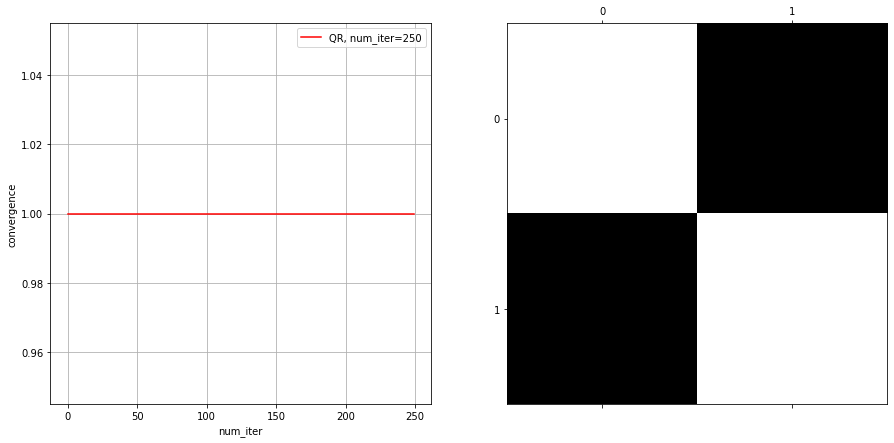

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(convergence, color='red', label=f'QR, num_iter={num_iter}')
plt.ylabel("convergence")
plt.xlabel("num_iter")

plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.spy(Ak, precision=1e-7)
plt.show()

The result is quite obvious because of $ \mu_k=0 $:

Since $ \mu_0=A_0[2, 2] = 0~~\Rightarrow~~A_0 - \mu_0I = A_0 = Q_1R_1 $, where

$ Q_{1}=\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right], R_{1}=\left[\begin{array}{ll}1 & 0 \\ 0 & 1\end{array}\right] \Rightarrow A_{1}=\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right]+0 \cdot I=A_{0}~~\Rightarrow~~$
$\mu_1= ~\ldots~ =\mu_k=0~~\Rightarrow~~A_0=A_1=\ldots=A_k$

### QR with Wilkinson shift  (15 pts)

To solve the problem that appears in the last example, we can use the Wilkinson shift:

$$\mu = a_m - \frac {sign(\delta) b^2_{m-1}} {(|\delta| + \sqrt{\delta^2 + b^2_{m-1}} )},$$

where $\delta = \frac{(a_{m-1} - a_m)}{2}$. If $\delta = 0$, then instead of $sign(\delta)$ you have to choose $1$ or $-1$ arbitrary.
The numbers $a_m, b_{m-1}, a_{m-1}$ are taken from matrix $B$:

$$
    B = 
    \begin{bmatrix} 
     a_{m-1} & b_{m-1} \\ 
     b_{m-1} & a_m \\ 
    \end{bmatrix},
$$  
which is a lower right bottom submatrix of $A^{(k)}$. Here $k$ is an iteration counter in QR algorithm.

- Compare convergence in the symmetric cases: 
    - distinctive eigenvalues
    - two coincident eigenvalues
    - maximum and minimum eigenvalues with the same absolute value
Choose the dimension $n \sim 100 $ for more representative results.
What do you observe? 

In [ ]:
# Your solution is here
np.sign(0)

0

In [ ]:
def wilkinson_shift(a, b, c):
    delta = (a - c) / 2
    # if delta == 0:
    #     delta = -1
    mu = c - np.sign(delta) * b**2 / (abs(delta) + np.sqrt(delta**2 + b**2))
    # print(mu)
    return  mu

def qr_algorithm_wilkinson(A_init, num_iter):
    # enter your code here
    Ak = hessenberg(A_init)
    n = Ak.shape[0]
    convergence = [0] * num_iter
    convergence[0] = np.linalg.norm(Ak, ord=np.inf)
    for k in range(1, num_iter): 
        mu = wilkinson_shift(Ak[n - 2, n - 2], Ak[n - 2, n - 1], Ak[n - 1, n - 1])
        Qk, Rk = np.linalg.qr(Ak - mu * np.identity(n))
        Ak = Rk.dot(Qk) + mu * np.identity(n)
        convergence[k] = np.linalg.norm(Ak, ord=np.inf)
    return Ak, convergence

### Distinctive eigenvalues

In [ ]:
A = spsp.spdiags(np.vstack((-1*ex,  2*ex, -1*ex)), [-1, 0, 1], 10, 10, 'csr')
np.linalg.eigvals(A.toarray()) 
A.toarray()

array([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.]])

In [ ]:
n = 50
ex = np.ones(n)
A = spsp.spdiags(np.vstack((-1*ex,  2*ex, -1*ex)), [-1, 0, 1], n, n, 'csr')
# A = np.array([[0, 1], [1, 0]])
num_iter = 200
Ak_wilkinson, convergence_wilkinson = qr_algorithm_wilkinson(A.toarray(), num_iter)
# Ak, convergence = qr_algorithm(A.toarray(), num_iter)

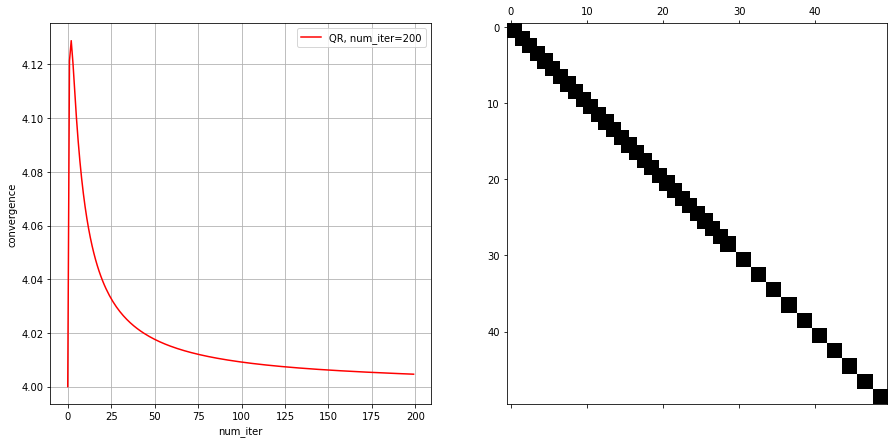

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(convergence_wilkinson, color='red', label=f'QR, num_iter={num_iter}')
plt.ylabel("convergence")
plt.xlabel("num_iter")

plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.spy(Ak_wilkinson, precision=1e-7)
plt.show()

### Two coincident eigenvalues

In [ ]:
A = spsp.spdiags(np.vstack((5*ex,  3*ex, -2*ex)), [-1, 0, 1], 10, 10, 'csr')
np.linalg.eigvals(A.toarray()) 

array([3.+6.06836639j, 3.-6.06836639j, 3.+5.32055451j, 3.-5.32055451j,
       3.+4.14170294j, 3.-4.14170294j, 3.+0.90007807j, 3.-0.90007807j,
       3.+2.62731523j, 3.-2.62731523j])

In [ ]:
n = 50
ex = np.ones(n)
A = spsp.spdiags(np.vstack((5*ex,  3*ex, -2*ex)), [-1, 0, 1], n, n, 'csr')
num_iter = 100
Ak_wilkinson, convergence_wilkinson = qr_algorithm_wilkinson(A.toarray(), num_iter)
# Ak, convergence = qr_algorithm(A.toarray(), num_iter)

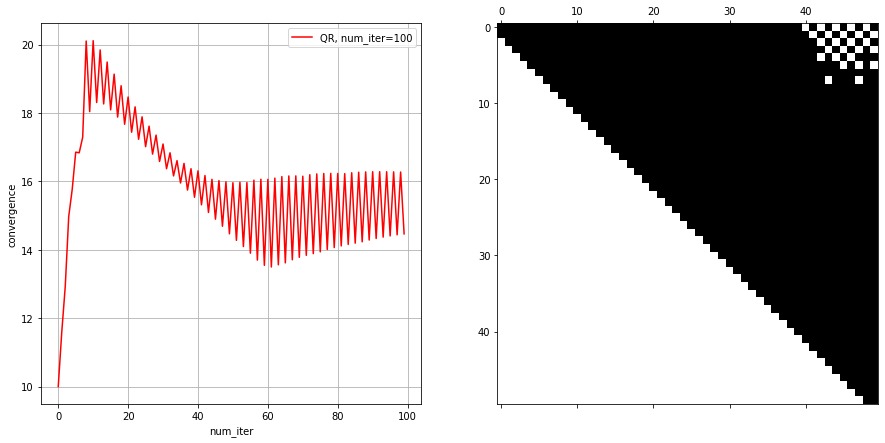

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(convergence_wilkinson, color='red', label=f'QR, num_iter={num_iter}')
plt.ylabel("convergence")
plt.xlabel("num_iter")

plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.spy(Ak_wilkinson, precision=1e-7)
plt.show()

## Problem 4. (Movie Recommender system) 15 pts

Imagine the world without NLA where you have free evenings and you can watch movies!  
But it is always hard to choose a movie to watch. 
In this problem we suggest you to build your own movie recommender system based on SVD decomposition, so you can combine two perfect things: Numerical Linear Algebra and cinematography!

In order to build recommender system you need data. 
Here you are https://grouplens.org/datasets/movielens/1m/

Usually all recommender systems may be devided into two groups

#### Collaborative filtering. 

This approach is based on user-item interaction.
It has one important assumption: user who has liked an item in the past will also likes the same in the future. Suppose the user A likes the films about vampires. 
He is Twilight saga fan and he has watched the film "What we do in the shadows" and liked it or unliked it, in other words he evaluated it somehow. And suppose another user B, who has the similair behavior to the first user (he is also Twilight saga fan). And the chance, that he will estimate "What we do in the shadows" in the same way that user A did, is huge. So, the purpose of the collaborative filtering is to predict a user's behavior based on behavior of the simular users.

#### Content based filtering.

Collaborative filtering has some essential flaws. The main one is called "cold start". "Cold start" happens when the new user comes and he has not react anyhow to the items. So we do not know his past behavior and we do not know what to advise. Here content based filtering helps. Often resources gather some extra info about users and items before a user comes down to utilising the resource. So, for example we would know that user likes horror movies before he watched anything on the resource.


- In this task you will implement Collaborative filtering based on SVD (we will use the function from the proper package and check if the result recommender system advices the similar movies)

1) (1 pts)  Explore the data. Construct the interaction matrix $M$ of size $m \times n$ which contains the information of how a certain user rated a certain film. 

2) (5 pts)  Compute SVD of this matrix. Remeber that matrix $M$ is sparse (one user can hardly watch all the movies) so the good choice would be to use method from ```scipy.sparse.linalg``` package

$$ M = USV^{\top}, $$

where $U$ is a $m \times r $ orthogonal matrix with left singular vectors, which represents the relationship between users and latent factors, $S$ is a $r \times r $ diagonal matrix, which describes the strength of each latent factor and $V^\top$ is a $r \times n$ matrix with right singular vectors, which represent the embeddings of  items (movies in our case) in latent space.
Describe any simple heuristic to choose appropriate value for $r$ and explain why do you expect that it will work.


In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd

In [ ]:
!unzip ml-1m.zip

Archive:  ml-1m.zip
   creating: ml-1m/
  inflating: __MACOSX/._ml-1m        
  inflating: ml-1m/movies.dat        
  inflating: __MACOSX/ml-1m/._movies.dat  
  inflating: ml-1m/ratings.dat       
  inflating: __MACOSX/ml-1m/._ratings.dat  
  inflating: ml-1m/README            
  inflating: __MACOSX/ml-1m/._README  
  inflating: ml-1m/users.dat         
  inflating: __MACOSX/ml-1m/._users.dat  


In [ ]:
movies_info = {'MovieID': [], 'Title': [], 'Genres': []}
with open('ml-1m/movies.dat') as f:
  while 1:
    s = f.readline().strip().split('::')
    if s == ['']:
      break
    movies_info['MovieID'].append(int(s[0]))
    movies_info['Title'].append(s[1])
    movies_info['Genres'].append(s[2].split('|'))

users_info = {'UserID': [], 'Gender': [], 'Age': [], 'Occupation': [], 'Zip-code': []}
with open('ml-1m/users.dat') as f:
  while 1:
    s = f.readline().strip().split('::')
    if s == ['']:
      break
    users_info['UserID'].append(int(s[0]))
    users_info['Gender'].append(s[1])
    users_info['Age'].append(int(s[2]))
    users_info['Occupation'].append(int(s[3]))
    users_info['Zip-code'].append(s[4])

ratings_info = {'UserID': [], 'MovieID': [], 'Rating': [], 'Timestamp': []}
with open('ml-1m/ratings.dat') as f:
  while 1:
    s = f.readline().strip().split('::')
    if s == ['']:
      break
    ratings_info['UserID'].append(int(s[0]))
    ratings_info['MovieID'].append(int(s[1]))
    ratings_info['Rating'].append(int(s[2]))
    ratings_info['Timestamp'].append(int(s[3]))


1) (1 pts) Explore the data. Construct the interaction matrix  𝑀  of size  𝑚×𝑛  which contains the information of how a certain user rated a certain film.

In [ ]:
df_ratings = pd.DataFrame(ratings_info)

ref: https://gist.github.com/TomLin/918f246e14bc4a34c45461d862a42141


In [ ]:
from scipy import sparse
from pandas.api.types import CategoricalDtype

users = np.array(list(df_ratings['UserID'].unique()))
movies = np.array(list(df_ratings['UserID'].unique()))

ratings = np.array(ratings_info['Rating'])

rows = df_ratings['UserID'].astype(CategoricalDtype(categories=users)).cat.codes

cols = df_ratings['MovieID'].astype(CategoricalDtype(categories=movies)).cat.codes

interactions = sparse.csr_matrix((ratings, (rows, cols)), shape=(len(users), len(movies)), dtype=float)

In [ ]:
interactions.toarray()

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.]])

2) (5 pts) Compute SVD of this matrix. Remeber that matrix  𝑀  is sparse (one user can hardly watch all the movies) so the good choice would be to use method from scipy.sparse.linalg package
𝑀=𝑈𝑆𝑉⊤, 
where  𝑈  is a  𝑚×𝑟  orthogonal matrix with left singular vectors, which represents the relationship between users and latent factors,  𝑆  is a  𝑟×𝑟  diagonal matrix, which describes the strength of each latent factor and  𝑉⊤  is a  𝑟×𝑛  matrix with right singular vectors, which represent the embeddings of items (movies in our case) in latent space. Describe any simple heuristic to choose appropriate value for  𝑟  and explain why do you expect that it will work.

In [ ]:
# Compute Singular Value Decomposition of interaction matrix. You can use built-in functions
from scipy.sparse.linalg import svds

Text(0, 0.5, 'singular number')

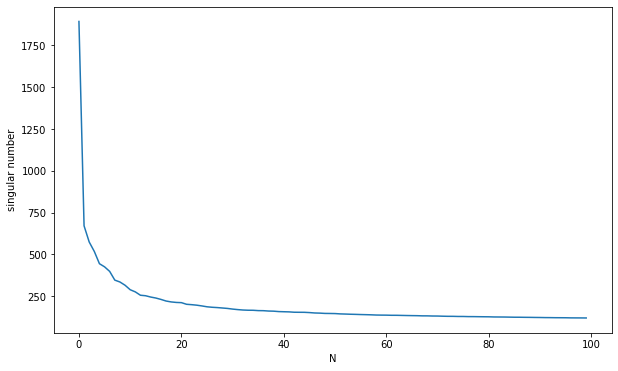

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(svds(interactions, k=100, return_singular_vectors=False)[::-1])
plt.xlabel('N')
plt.ylabel('singular number')

In [ ]:
s[-30]

177.4081450100902

Can see that r=30 is enough for min singular value to be in 10 times smaller then the largest singular value.

In [ ]:
u, s, vt = svds(interactions, k=30)

3) (2 pts) In order to get weighted item-latent factors, we can multiply $S$ and $V^{T}$. Please, remember that $S$ is diagonal and multiply them efficiently.

In [ ]:
item_latent_factors = vt.T * s # shape (n_movies, embed_length)

Now we have vectors that represent our item space. In other words we have $N$ movies and $N$ vectors which describe each movie, a.k.a. embeddings. 
In order to know if two movies are similar or not we need just to check if the corresponding vectors are similair or not. How we can do this?

4) (2 pts)  Implement the cosine metric. If the cosine metric between two vectors equals to $1$ both vectors are collinear, if $0$ vectors are orthogonal, as a result corresponding movies are completely different.

$$
cosine(u,v) = \frac{u^{\top}v}{\|u\|_2\|v\|_2}
$$

In [ ]:
# Your solutuion is here
def cosine(u, v):
  return np.sum(u * v, axis=1) / (np.linalg.norm(u, axis=1) * np.linalg.norm(v, axis=1) + 1e-8)

In [ ]:
u = np.array([[0, 1], [1, 1]])
v = np.array([[0, 1], [1, -1]])

In [ ]:
cosine(u, v)

array([0.99999999, 0.        ])

5) (5 pts) Check your result. Implement the fuction, which finds and prints $k$ similar movies to the one you have chosen

In [ ]:
# Your solutuion is here

I want to find movies similar to movie_query

In [ ]:
movie_query = 0

In [ ]:
def find_similar(q, k=1, vecs=item_latent_factors):
  similarities = cosine(vecs[q][None, :], vecs)
  idxs = np.argsort(similarities)[-k - 1:-1][::-1]

  return idxs

In [ ]:
similar = find_similar(movie_query, 5)
similar

array([3113,   33,  587, 1264, 2354])

Let's see, what movies we recommended.

In [ ]:
df_movies = pd.DataFrame(movies_info)

Here is a movie, we know.

In [ ]:
df_movies[df_movies['MovieID'] == movie_query + 1]

,MovieID,Title,Genres
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"


Here is movies for us to see.

In [ ]:
df_movies[df_movies['MovieID'].isin(similar + 1)]

,MovieID,Title,Genres
33,34,Babe (1995),"[Children's, Comedy, Drama]"
584,588,Aladdin (1992),"[Animation, Children's, Comedy, Musical]"
1245,1265,Groundhog Day (1993),"[Comedy, Romance]"
2286,2355,"Bug's Life, A (1998)","[Animation, Children's, Comedy]"
3045,3114,Toy Story 2 (1999),"[Animation, Children's, Comedy]"


Enjoy watching the recommended movies!
